In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data_loader import data_label_split
from data_loader import generate_data_set
from data_loader import data_standardization

from base_exp import mini_noise_signal_cv
from base_exp import train
from base_exp import multi_mini_noise_signal_cv

from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [2]:
mini_data=pd.read_csv("mini_moa_data_drop_NA.csv", index_col=0)

In [3]:
drop_NA_data=pd.read_csv("moa_data_drop_NA.csv", index_col=0)

In [4]:
week1_data = pd.read_csv("week1_full_data.csv", index_col=0)

# RF

In [3]:
rfc = RandomForestClassifier(min_samples_split=50, random_state=0) #MLPClassifier(alpha=1, max_iter=10000)#LogisticRegression(max_iter = 10000, solver = "saga", n_jobs = -1)

In [4]:
# full features
# train(10000, week1_data, rfc, 0)
multi_mini_noise_signal_cv(100, mini_data, "taxol", "DMSO", rfc, 10, 0, 0.5)

K fold CV: 10it [00:05,  1.84it/s]
K fold CV: 9it [00:04,  1.85it/s]]
K fold CV: 10it [00:05,  1.78it/s]
K fold CV: 10it [00:05,  1.94it/s]
K fold CV: 10it [00:05,  1.79it/s]
K fold CV: 10it [00:05,  1.86it/s]
K fold CV: 10it [00:05,  1.79it/s]
K fold CV: 10it [00:05,  1.93it/s]

K fold CV: 10it [00:04,  2.15it/s]
K fold CV: 10it [00:05,  1.82it/s]
K fold CV: 10it [00:05,  1.89it/s]
K fold CV: 10it [00:05,  1.88it/s]
K fold CV: 10it [00:05,  1.93it/s]
K fold CV: 10it [00:05,  1.95it/s]

K fold CV: 10it [00:04,  2.06it/s]
K fold CV: 10it [00:04,  2.03it/s]
K fold CV: 10it [00:05,  1.97it/s]


{0.05: [0.59,
  0.15132745950421556,
  0.4861597993623576,
  0.04837763511903609,
  0.4998609297021398,
  0.05321344092939143],
 0.1: [0.51,
  0.16401219466856723,
  0.4967266523801148,
  0.043045203973045655,
  0.49854911050085293,
  0.04576589340778915],
 0.15: [0.52,
  0.15362291495737215,
  0.48611192190085684,
  0.050020159016508615,
  0.5001866352560932,
  0.06553360369830664],
 0.2: [0.58,
  0.12489995996796796,
  0.48310282264699816,
  0.06285538868675643,
  0.5174637750275795,
  0.06970846595144056],
 0.25: [0.5599999999999998,
  0.20591260281974,
  0.47909554828401396,
  0.0744424347694898,
  0.5142178059494165,
  0.08623632941218733],
 0.3: [0.6299999999999999,
  0.11874342087037916,
  0.4741803094216527,
  0.08399331101718975,
  0.5304740785295468,
  0.11391011302552566],
 0.35: [0.6699999999999999,
  0.11874342087037917,
  0.46245434208871106,
  0.07520978974809382,
  0.5352694758305714,
  0.1134829628975435],
 0.4: [0.6699999999999999,
  0.09000000000000001,
  0.449963482

In [ ]:
# single feature
sf_drop_NA_data = drop_NA_data[["compound", "concentration",
                                "moa", "row ID", "Iteration (#2)", "COND",
                               "AreaShape_Area_Nuclei"]]


In [ ]:
train(10000, sf_drop_NA_data, rfc, 0)

In [4]:
result = mini_noise_signal_cv(500, mini_data, "taxol", "DMSO", clf, 10, 0)
(mean_mean_accuracy, std_mean_accuracy,
mean_pred_score_control, std_pred_score_control,
mean_pred_score_treatment, std_pred_score_treatment) = result

mean_accuracy = np.array(mean_mean_accuracy)
std_accuracy = np.array(std_mean_accuracy)
mean_pred_score_control = np.array(mean_pred_score_control)
std_pred_score_control = np.array(std_pred_score_control)
mean_pred_score_treatment = np.array(mean_pred_score_treatment)
std_pred_score_treatment = np.array(std_pred_score_treatment)
z_score = 1-3*(std_pred_score_control+std_pred_score_treatment)/(np.abs(mean_pred_score_control-mean_pred_score_treatment))

In [ ]:
classifiers = [
#     KNeighborsClassifier(30),
#     SVC(kernel="linear", C=0.025, probability = True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=1, max_iter=1000),]

for model in classifiers:
    train(10000, sf_drop_NA_data, model, 0)

  0%|          | 0/19 [00:00<?, ?it/s]/root/miniconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpc.py:432: RuntimeWarning: overflow encountered in exp
  - np.log(np.diag(L)).sum()


In [5]:
perc, size, splits, data, model, control, treatment, verbose = 5/100, 100, 3, mini_data,rfc, 'DMSO', "taxol", 0

In [10]:
from sklearn.preprocessing import StandardScaler

In [14]:
mini_batch = generate_data_set(size, perc, data, treatment, control)
X, y = data_label_split(mini_batch)
y = y["compound"]

skf = StratifiedKFold(n_splits = splits)
pred_score_control = np.array([])
pred_score_treatment = np.array([])
mean_accuracy = []


for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    if verbose != 0:
        print("Fold %d" % i, "TRAIN:", train_index , "TEST:", test_index)
    X_train, X_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(X_train)
    print(pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns, index = X_train.index))
    break

    X_train, X_test = data_standardization(X_train), data_standardization(X_test)#pandas.DataFrame(StandardScaler().fit_transform(data), columns = data.columns)
    lgs = model.fit(X_train, y_train)
    pred_score_control = np.append(pred_score_control, lgs.predict_proba(X_test[y_test=="DMSO"])[:,1])
    pred_score_treatment = np.append(pred_score_treatment, lgs.predict_proba(X_test[y_test=="taxol"])[:,1])
    mean_accuracy.append(lgs.score(X_test, y_test))

    ImageNumber_Nuclei  ObjectNumber_Nuclei  AreaShape_Area_Nuclei  \
31                8443                  297                    715   
34                6043                  211                    926   
35                9844                   24                   1002   
37                2963                   28                    977   
38                5563                  175                    772   
..                 ...                  ...                    ...   
95                 323                   89                    742   
96                6397                  120                   1224   
97                7637                  142                    643   
98                7441                  162                    508   
99                1638                  102                    646   

    AreaShape_Center_X_Nuclei  AreaShape_Center_Y_Nuclei  \
31                      769.0                      807.0   
34                       29.0          

Text(0.5, 0, 'percent of taxol')

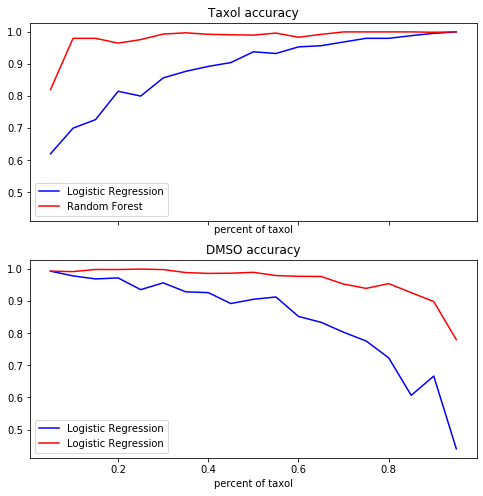

In [112]:
fig, ax = plt.subplots(2, sharex=True, sharey=True,figsize=(8, 8))
l1 = ax[0].plot([i/100 for i in range(5,96,5)], n_acc, color = 'b', label = "Logistic Regression")
l2 = ax[0].plot([i/100 for i in range(5,96,5)], n_, color = 'r', label = "Random Forest")
ax[0].legend()
ax[0].title.set_text("Taxol accuracy")
ax[0].set_xlabel('percent of taxol')
l3 = ax[1].plot([i/100 for i in range(5,96,5)], p_acc, color = 'b',label = "Logistic Regression")
l4 = ax[1].plot([i/100 for i in range(5,96,5)], p_, color = 'r',label = "Logistic Regression")
ax[1].legend()
ax[1].title.set_text("DMSO accuracy")
ax[1].set_xlabel('percent of taxol')

In [57]:
acc_gp_7 = plt.imread("./results/Accuracy_GaussianProcessClassifier_sample10000_feature7.png")
acc_knn_7 = plt.imread("./results/Accuracy_KNeighborsClassifier_sample10000_feature513.png")

In [29]:
import os

In [59]:
acc_gp_7.shape

(288, 432, 4)

In [63]:
12.19*5

60.949999999999996

In [62]:
for i in os.listdir("./results"):
    if ".png" in i:
        print(plt.imread("./results/"+i).shape)

(288, 432, 4)
(480, 640, 4)
(480, 640, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(480, 640, 4)
(480, 640, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)
(288, 432, 4)


In [58]:
np.vstack((acc_gp_7,acc_knn_7)).shape

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 432 and the array at index 1 has size 640

In [56]:
acc_gp_7.shape

(288, 432, 4)

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import *
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

cancer = load_breast_cancer()
X = cancer.data[:,0:2] # Only use two of the features
# X[:,1] = X[:,1]*10000 # Scaling
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(normalize(X,axis=0), y, test_size=0.33, random_state=42)

log_reg =MLPClassifier(solver='lbfgs')#LogisticRegression()#RandomForestClassifier()
log_reg.fit(X_train, y_train)

fpr, tpr, _ = metrics.roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
auc = metrics.auc(fpr, tpr)
auc

0.9723695571728136

In [19]:
normalize(X)

array([[0.86616154, 0.49976413],
       [0.75673201, 0.65372522],
       [0.67966955, 0.73351844],
       ...,
       [0.50889456, 0.86082886],
       [0.57475368, 0.81832647],
       [0.30150324, 0.95346515]])

In [20]:
MinMaxScaler().fit_transform(X)

array([[0.52103744, 0.0226581 ],
       [0.64314449, 0.27257355],
       [0.60149557, 0.3902604 ],
       ...,
       [0.45525108, 0.62123774],
       [0.64456434, 0.66351031],
       [0.03686876, 0.50152181]])

In [18]:
cancer.data[:,0:2]

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [57]:
for i in range(3)
plt.figure(figsize=(12,12))
plt.subplot(int("52%d"%1))
plt.imshow(acc_gp_7)
plt.subplot(int("22%d"%2))
plt.imshow(acc_gp_7)

SyntaxError: invalid syntax (<ipython-input-57-48402c6d9903>, line 1)